Higor Grigorio dos Santos - BI3007511

<center>

# Tranformada de Fourier

</center>

In [1]:
import os

import numpy as np
from PIL import Image

image_names = os.listdir('./images')

# open all images in the folder ./images
images = [Image.open('./images/' + img).convert('L') for img in image_names]


def get_square(h, w):
    """
    A helper to get a square image with a square in the middle.

    :param h:  height
    :param w:  width
    :return:
    """
    zeros = np.zeros((h, w))
    zeros[int(h / 2) - 25:int(h / 2) + 25, int(w / 2) - 25:int(w / 2) + 25] = 1
    return zeros



1. Implementar a Transformada de Fourier (Utilize a biblioteca de sua preferência)

In [2]:
def fourier_transform(img):
    f = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f)
    fourier = 20 * np.log(np.abs(f_shift + 1))
    angle = np.angle(f_shift)
    return fourier, angle

2. Implementar a Transformada Inversa de Fourier (Utilize a biblioteca de sua preferência)

In [3]:
def inverse_fourier_transform(img):
    f = np.fft.ifftshift(img)
    f = np.fft.ifft2(f)
    return np.abs(f)

3. Plotar o espectro e fase.

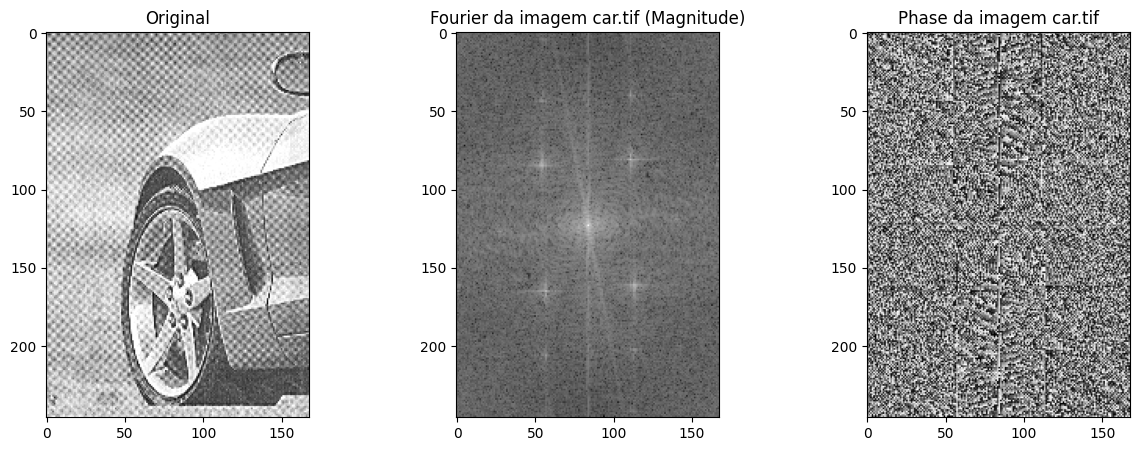

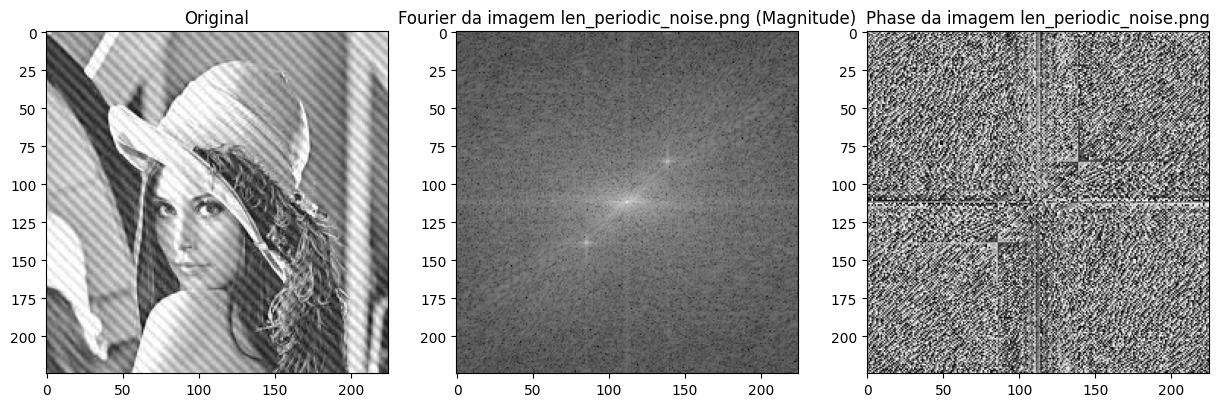

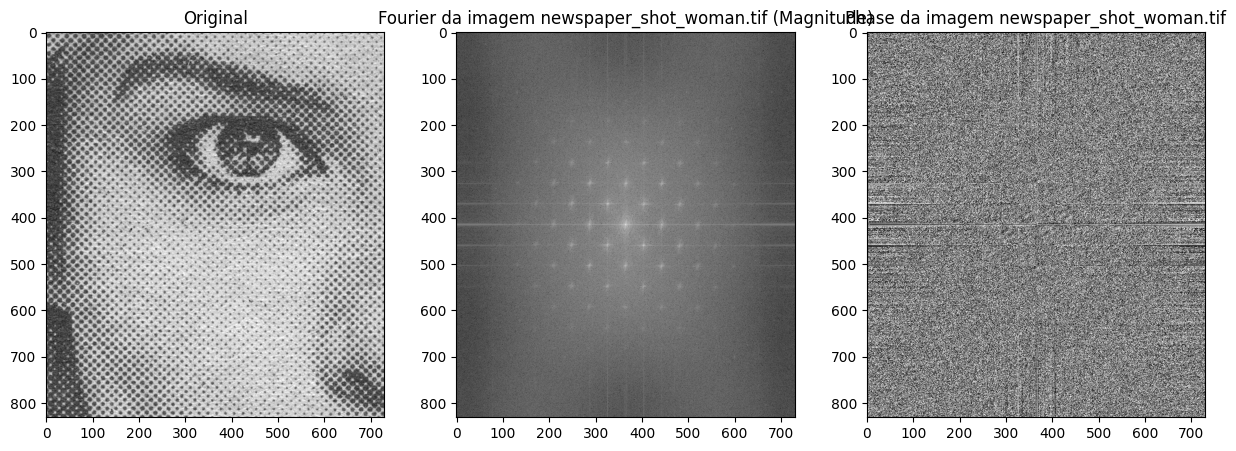

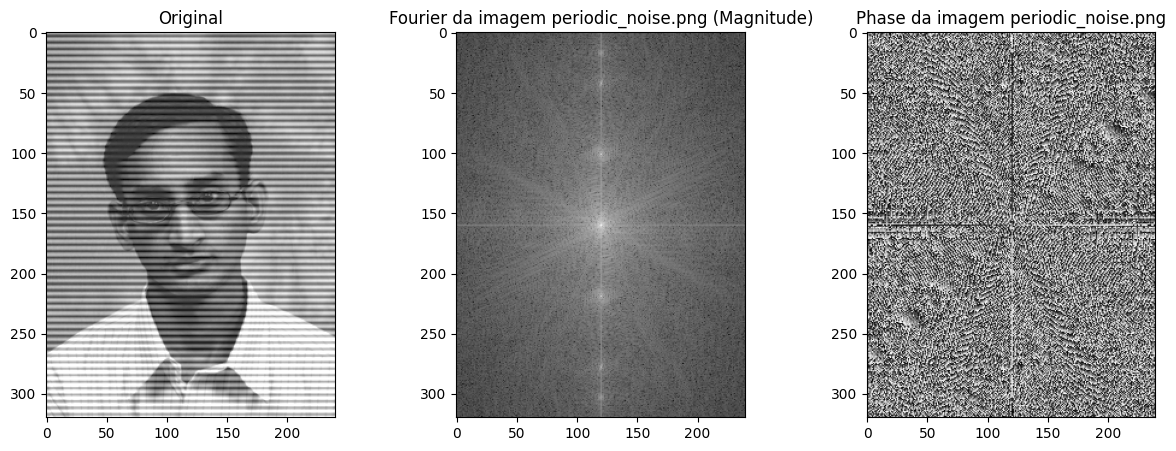

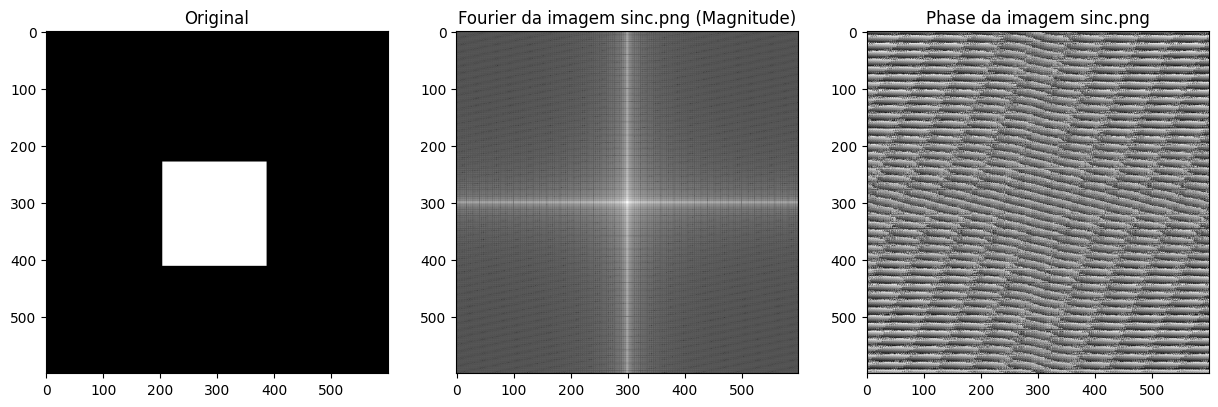

In [4]:
import matplotlib.pyplot as plt

for index in range(len(images)):
    img = images[index]
    img_fourier, img_phase = fourier_transform(img)

    fig, axis = plt.subplots(1, 3, figsize=(15, 5))
    axis[0].imshow(img, cmap='gray')
    axis[0].set_title('Original')

    axis[1].imshow(img_fourier, cmap='gray')
    axis[1].set_title('Fourier da imagem ' + image_names[index] + ' (Magnitude)')

    axis[2].imshow(img_phase, cmap='gray')
    axis[2].set_title('Phase da imagem ' + image_names[index])



4. Plotar o espectro 3D (Pesquisar formas de visualização 3D em Python)

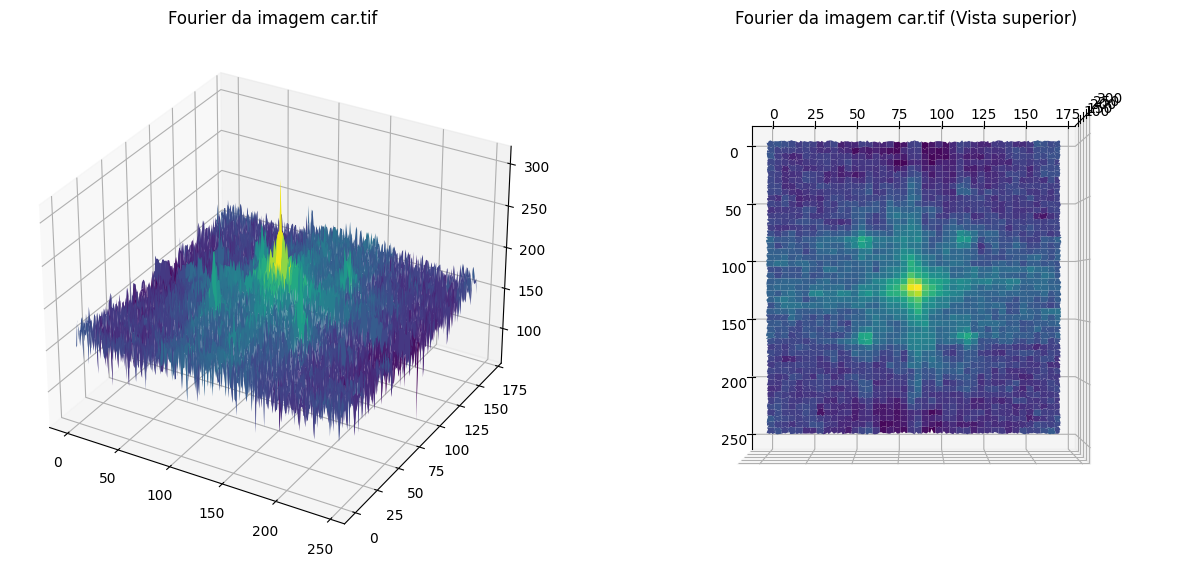

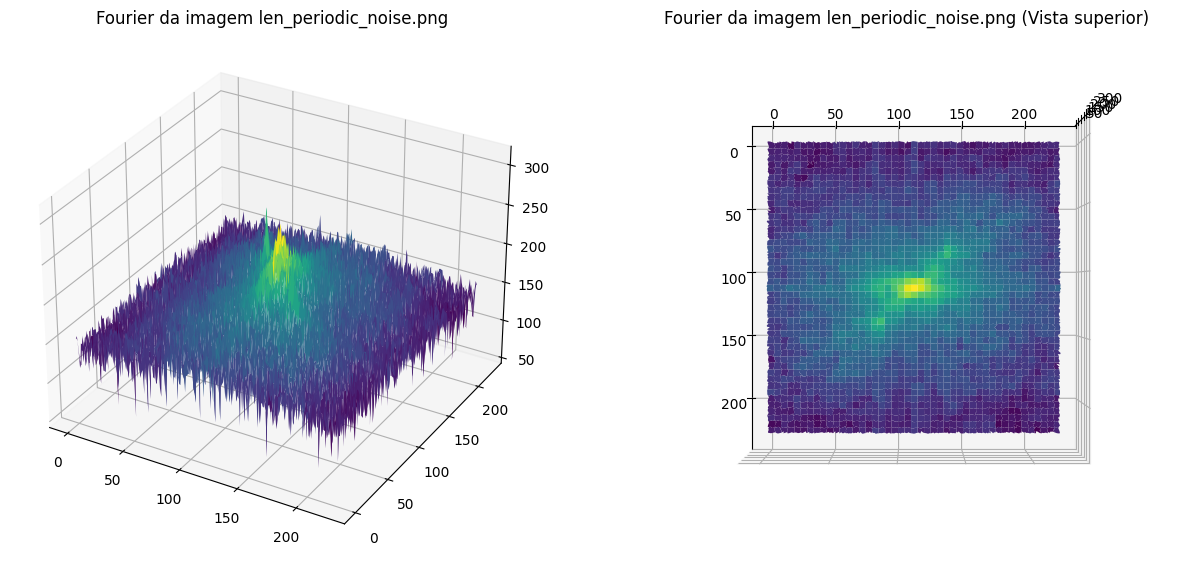

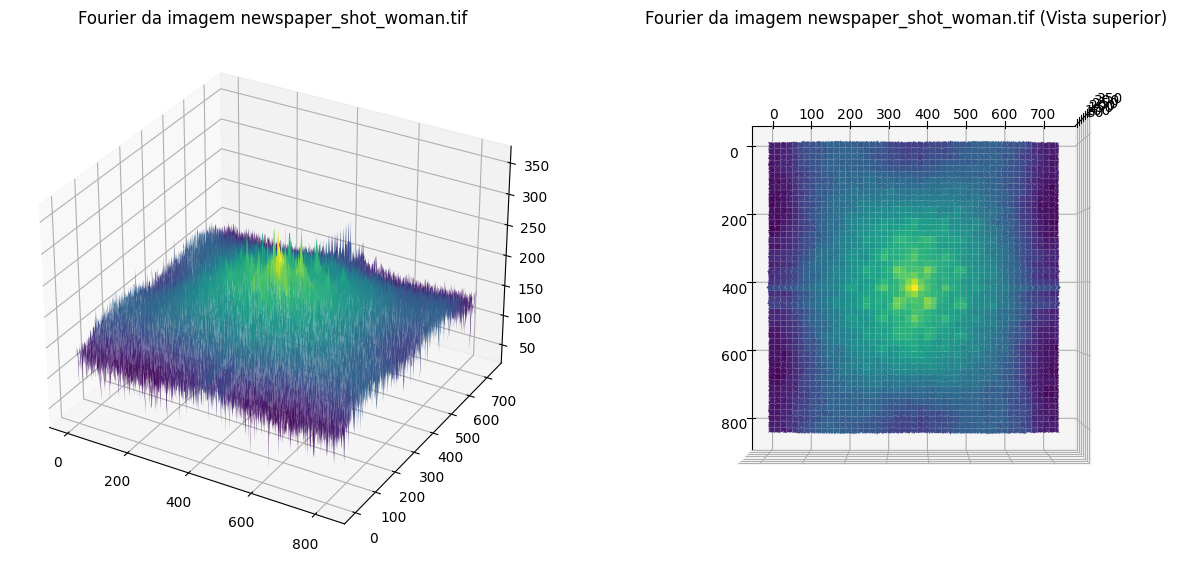

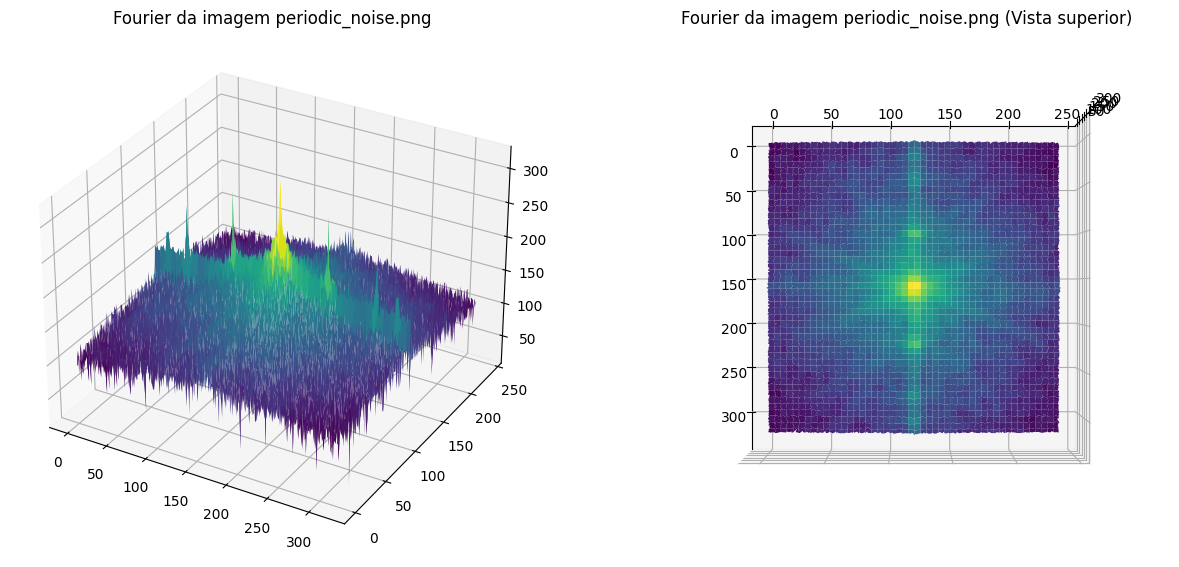

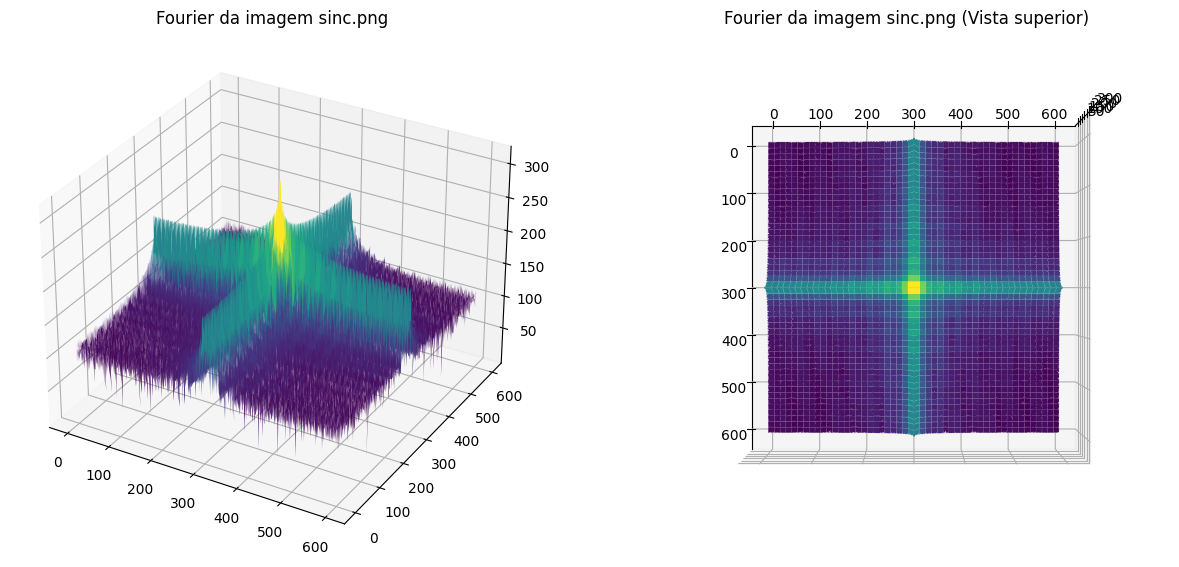

In [5]:
#plot 3d of the fourier transform

for index in range(len(images)):
    img = images[index]
    img_fourier, img_phase = fourier_transform(img)

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(221, projection='3d')
    x = np.arange(0, img_fourier.shape[0], 1)
    y = np.arange(0, img_fourier.shape[1], 1)
    X, Y = np.meshgrid(x, y)
    Z = img_fourier[X, Y]

    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Fourier da imagem ' + image_names[index])


    ax = fig.add_subplot(222, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.view_init(90, 0)
    ax.set_title('Fourier da imagem ' + image_names[index] + ' (Vista superior)')

    plt.show()